<a href="https://colab.research.google.com/github/JACOBABRAHAMJANE/page/blob/main/lab6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.

   id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0   1  0.000011   udp       -   INT      2      0     496       0   
1   2  0.000008   udp       -   INT      2      0    1762       0   
2   3  0.000005   udp       -   INT      2      0    1068       0   
3   4  0.000006   udp       -   INT      2      0     900       0   
4   5  0.000010   udp       -   INT      2      0    2126       0   

          rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0   90909.0902  ...                 1               2             0   
1  125000.0003  ...                 1               2             0   
2  200000.0051  ...                 1               3             0   
3  166666.6608  ...                 1               3             0   
4  100000.0025  ...                 1               3             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0           1           2                0   
1     

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:00:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 99.98%
Backpropagation NN Accuracy: 99.73%
Decision Tree Accuracy: 99.96%
Naïve Bayes Accuracy: 78.70%
Ensemble RF-BPNN Accuracy: 99.86%


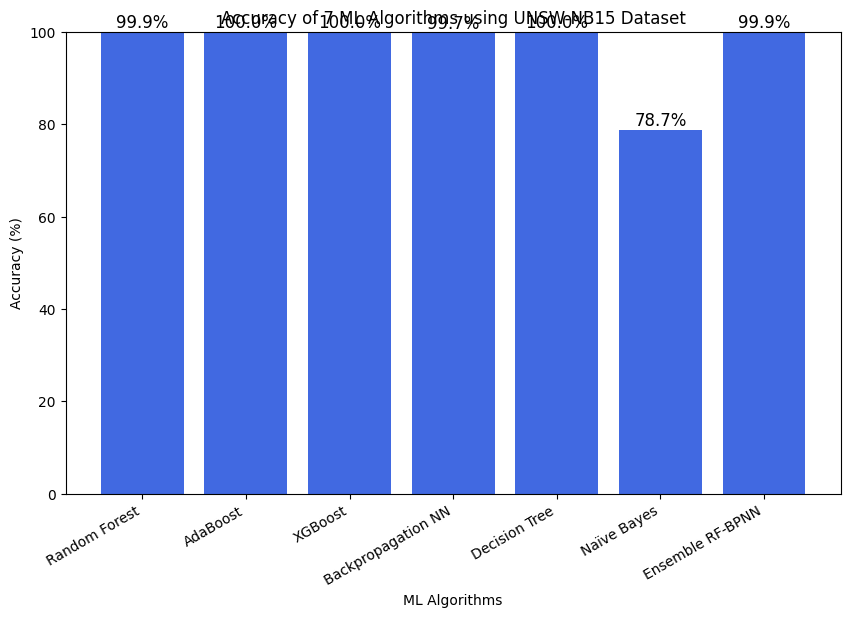

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Load the UNSW-NB15 dataset
file_path = "UNSW_NB15_training-set.csv"
df = pd.read_csv(file_path)

# Display dataset info
print(df.head())

# Drop unnecessary columns (adjust based on dataset structure)
df = df.select_dtypes(include=[np.number])  # Keep only numerical features

# Handle missing values if any
df.fillna(df.mean(), inplace=True)

# Split data into features and target
X = df.iloc[:, :-1]  # All columns except the last one as features
y = df.iloc[:, -1]   # Last column as the target variable

# Encode target labels if necessary
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize ML models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Backpropagation NN": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naïve Bayes": GaussianNB()
}

# Ensemble Model (Random Forest + Backpropagation NN)
ensemble_model = VotingClassifier(estimators=[
    ('rf', models["Random Forest"]),
    ('bpnn', models["Backpropagation NN"])
], voting='soft')

# Add ensemble model to the list
models["Ensemble RF-BPNN"] = ensemble_model

# Train and evaluate models
accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred) * 100  # Compute accuracy
    accuracy_scores[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}%")

# Visualizing the results
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='royalblue')
plt.xlabel("ML Algorithms")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy of 7 ML Algorithms using UNSW-NB15 Dataset")
plt.ylim(0, 100)
plt.xticks(rotation=30, ha="right")

# Show accuracy values on top of bars
for i, (name, acc) in enumerate(accuracy_scores.items()):
    plt.text(i, acc + 1, f"{acc:.1f}%", ha='center', fontsize=12)

plt.show()

   id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0   1  0.000011   udp       -   INT      2      0     496       0   
1   2  0.000008   udp       -   INT      2      0    1762       0   
2   3  0.000005   udp       -   INT      2      0    1068       0   
3   4  0.000006   udp       -   INT      2      0     900       0   
4   5  0.000010   udp       -   INT      2      0    2126       0   

          rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0   90909.0902  ...                 1               2             0   
1  125000.0003  ...                 1               2             0   
2  200000.0051  ...                 1               3             0   
3  166666.6608  ...                 1               3             0   
4  100000.0025  ...                 1               3             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0           1           2                0   
1     

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Simple MLP Accuracy: 99.64%
Deep MLP Accuracy: 99.45%
CNN 1D Accuracy: 99.28%


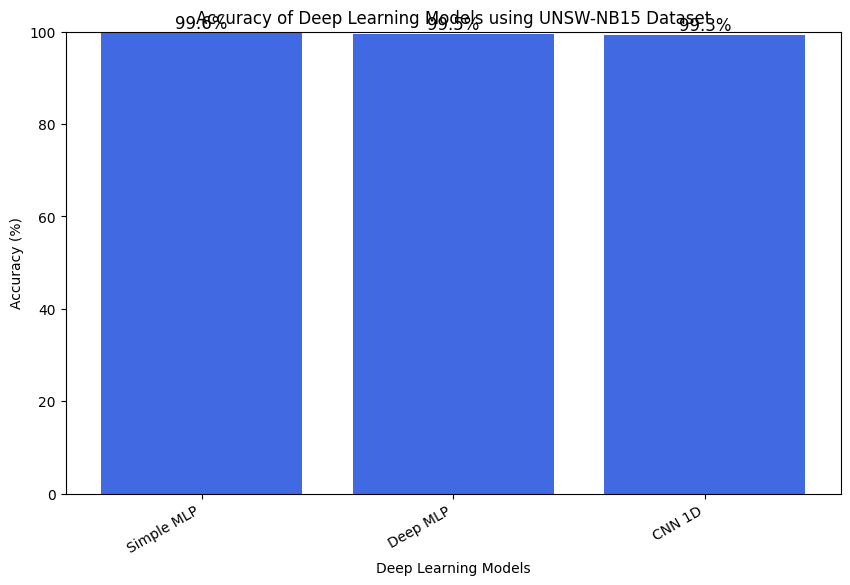

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras import layers

# Load the UNSW-NB15 dataset
file_path = "UNSW_NB15_training-set.csv"
df = pd.read_csv(file_path)

# Display dataset info
print(df.head())

# Drop unnecessary columns (adjust based on dataset structure)
df = df.select_dtypes(include=[np.number])  # Keep only numerical features

# Handle missing values if any
df.fillna(df.mean(), inplace=True)

# Split data into features and target
X = df.iloc[:, :-1]  # All columns except the last one as features
y = df.iloc[:, -1]  # Last column as the target variable

# Encode target labels if necessary
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Deep Learning models
models = {
    "Simple MLP": keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(len(np.unique(y)), activation='softmax')
    ]),
    "Deep MLP": keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(len(np.unique(y)), activation='softmax')
    ]),
    "CNN 1D": keras.Sequential([
        layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
        layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(len(np.unique(y)), activation='softmax')
    ]),
}

# Compile and train models
accuracy_scores = {}
for name, model in models.items():
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)  # Train quietly
    y_pred_probs = model.predict(X_test, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}%")

# Visualizing the results
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='royalblue')
plt.xlabel("Deep Learning Models")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy of Deep Learning Models using UNSW-NB15 Dataset")
plt.ylim(0, 100)
plt.xticks(rotation=30, ha="right")

# Show accuracy values on top of bars
for i, (name, acc) in enumerate(accuracy_scores.items()):
    plt.text(i, acc + 1, f"{acc:.1f}%", ha='center', fontsize=12)

plt.show()

Isolation Forest Accuracy: 44.68%
Isolation Forest F1-score: 15.18%
Isolation Forest AUC-ROC: 48.61%
One-Class SVM Accuracy: 43.66%
One-Class SVM F1-score: 13.00%
One-Class SVM AUC-ROC: 47.61%
Local Outlier Factor Accuracy: 47.42%
Local Outlier Factor F1-score: 19.05%
Local Outlier Factor AUC-ROC: 51.40%


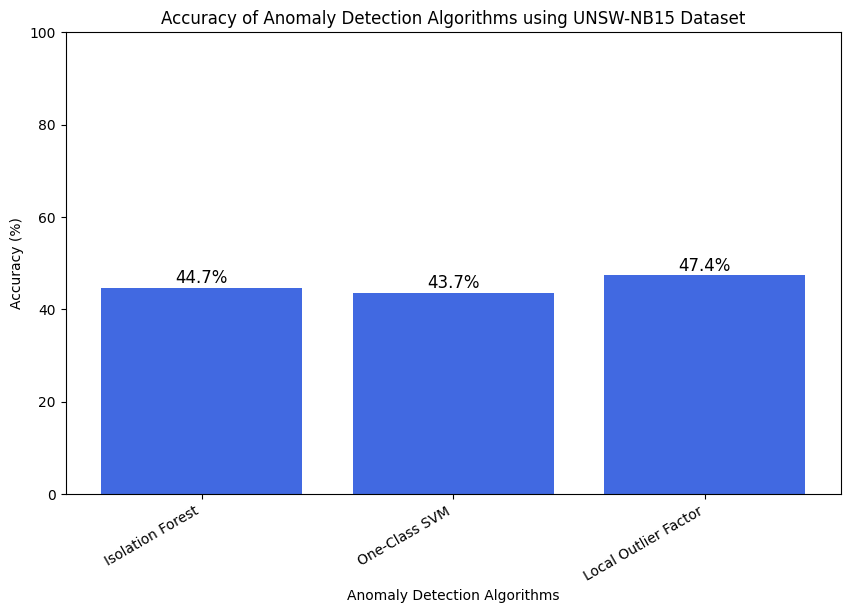

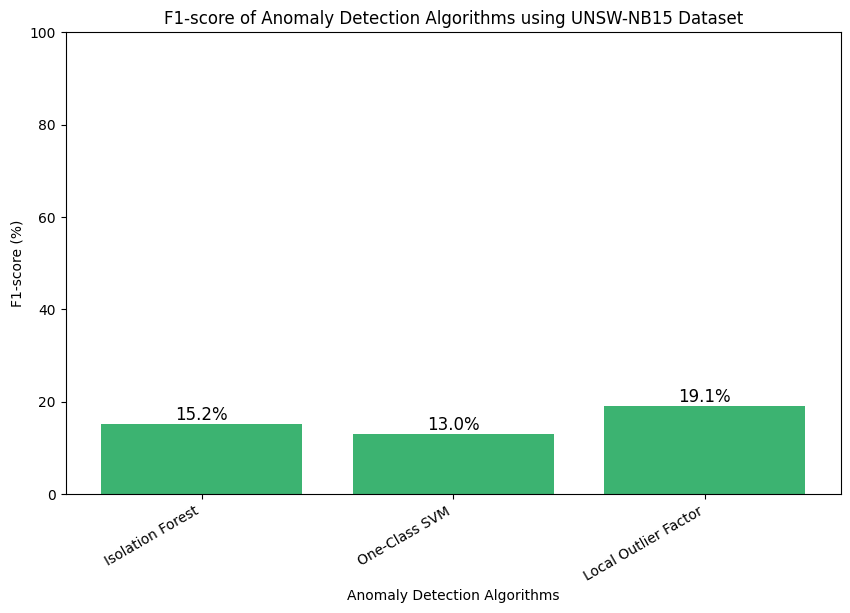

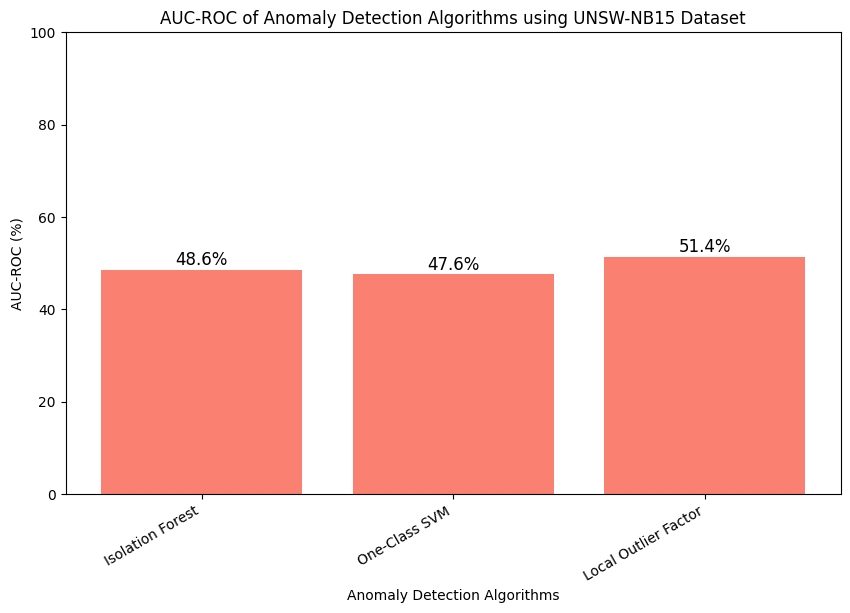

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Load the UNSW-NB15 dataset (replace with your file path)
file_path = "UNSW_NB15_training-set.csv"
df = pd.read_csv(file_path)

# Preprocessing (adjust as needed)
df = df.select_dtypes(include=[np.number])
df.fillna(df.mean(), inplace=True)

# Assuming the last column is the target (adjust if needed)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Convert labels to binary (normal=0, anomaly=1)
y = np.where(y == 0, 0, 1) # assuming 0 is normal, adjust as necessary.

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Anomaly Detection Models
models = {
    "Isolation Forest": IsolationForest(contamination=0.1, random_state=42),
    "One-Class SVM": OneClassSVM(nu=0.1),
    "Local Outlier Factor": LocalOutlierFactor(contamination=0.1)
}

# Train and Evaluate Models
accuracy_scores = {}
f1_scores = {}
auc_scores = {}

for name, model in models.items():
    if name == "Local Outlier Factor":
        y_pred = model.fit_predict(X_test)
        y_pred = np.where(y_pred == 1, 0, 1) # LOF returns -1 for anomalies, 1 for normal
    else:
        model.fit(X_train)
        y_pred = model.predict(X_test)
        y_pred = np.where(y_pred == 1, 0, 1) # IF and OCSVM return 1 for normal, -1 for anomalies

    accuracy = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    auc = roc_auc_score(y_test, y_pred) * 100

    accuracy_scores[name] = accuracy
    f1_scores[name] = f1
    auc_scores[name] = auc

    print(f"{name} Accuracy: {accuracy:.2f}%")
    print(f"{name} F1-score: {f1:.2f}%")
    print(f"{name} AUC-ROC: {auc:.2f}%")

# Visualizing the Results (Accuracy)
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='royalblue')
plt.xlabel("Anomaly Detection Algorithms")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy of Anomaly Detection Algorithms using UNSW-NB15 Dataset")
plt.ylim(0, 100)
plt.xticks(rotation=30, ha="right")

for i, (name, acc) in enumerate(accuracy_scores.items()):
    plt.text(i, acc + 1, f"{acc:.1f}%", ha='center', fontsize=12)

plt.show()

# Visualizing the Results (F1-score)
plt.figure(figsize=(10, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color='mediumseagreen')
plt.xlabel("Anomaly Detection Algorithms")
plt.ylabel("F1-score (%)")
plt.title("F1-score of Anomaly Detection Algorithms using UNSW-NB15 Dataset")
plt.ylim(0, 100)
plt.xticks(rotation=30, ha="right")

for i, (name, f1) in enumerate(f1_scores.items()):
    plt.text(i, f1 + 1, f"{f1:.1f}%", ha='center', fontsize=12)

plt.show()

# Visualizing the Results (AUC-ROC)
plt.figure(figsize=(10, 6))
plt.bar(auc_scores.keys(), auc_scores.values(), color='salmon')
plt.xlabel("Anomaly Detection Algorithms")
plt.ylabel("AUC-ROC (%)")
plt.title("AUC-ROC of Anomaly Detection Algorithms using UNSW-NB15 Dataset")
plt.ylim(0, 100)
plt.xticks(rotation=30, ha="right")

for i, (name, auc) in enumerate(auc_scores.items()):
    plt.text(i, auc + 1, f"{auc:.1f}%", ha='center', fontsize=12)

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Isolation Forest Accuracy: 45.04%
Isolation Forest F1-score: 0.24%
Isolation Forest AUC-ROC: 49.98%
One-Class SVM Accuracy: 45.12%
One-Class SVM F1-score: 1.09%
One-Class SVM AUC-ROC: 50.02%
Local Outlier Factor Accuracy: 44.98%
Local Outlier Factor F1-score: 0.07%
Local Outlier Factor AUC-ROC: 49.92%
Neural Network Anomaly Accuracy: 45.14%
Neural Network Anomaly F1-score: 0.35%
Neural Network Anomaly AUC-ROC: 50.08%


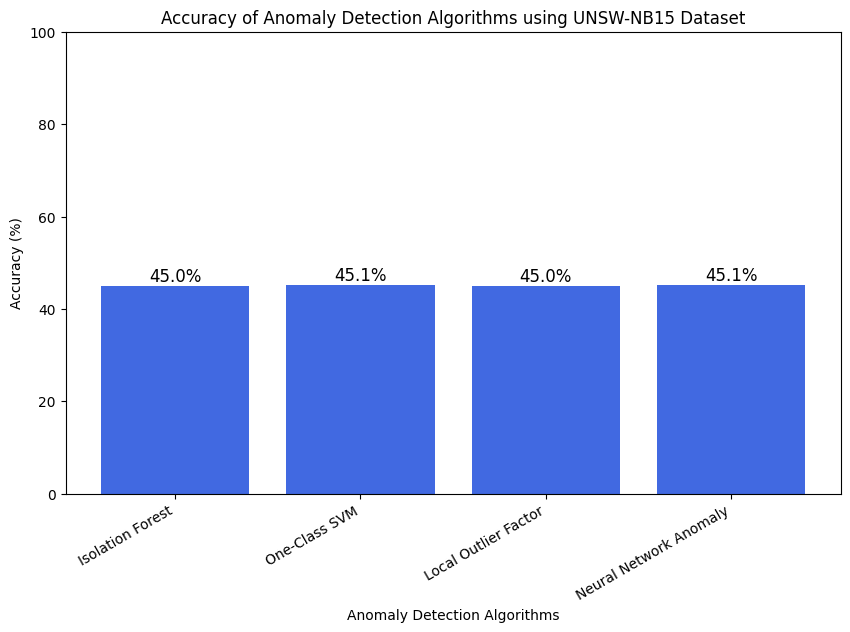

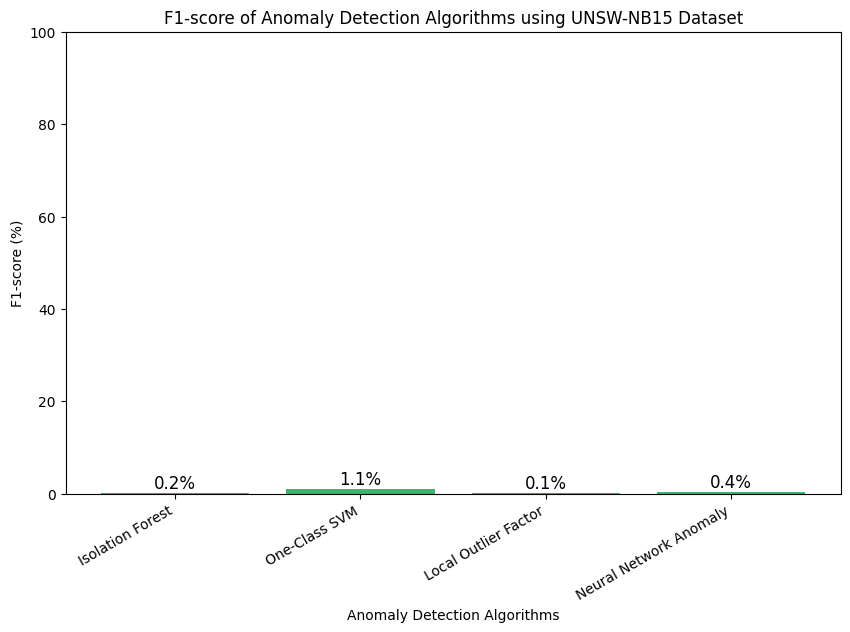

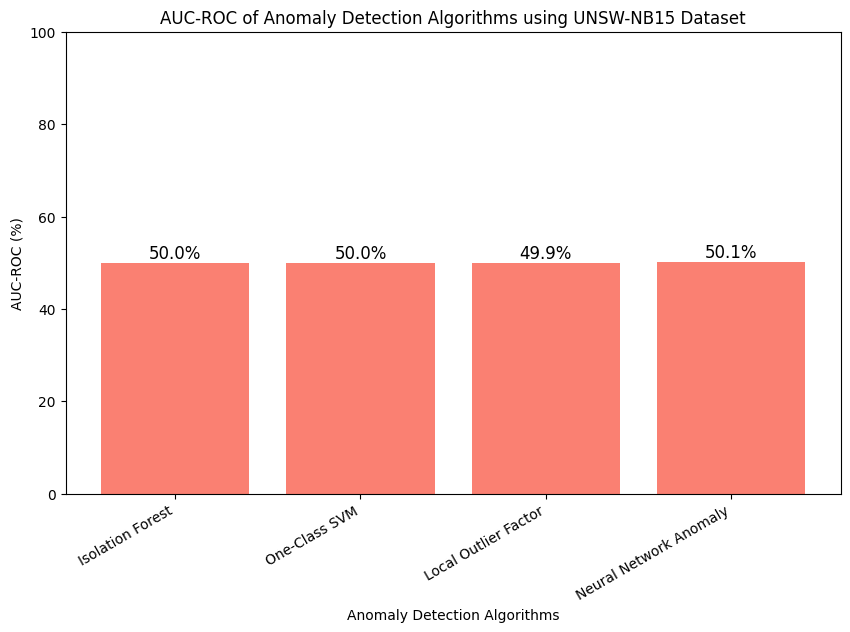

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow import keras
from tensorflow.keras import layers

# Load the UNSW-NB15 dataset (replace with your file path)
file_path = "UNSW_NB15_training-set.csv"
df = pd.read_csv(file_path)

# Preprocessing (adjust as needed)
df = df.select_dtypes(include=[np.number])
df.fillna(df.mean(), inplace=True)

# Assuming the last column is the target (adjust if needed)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Convert labels to binary (normal=0, anomaly=1)
y = np.where(y == 0, 0, 1) # assuming 0 is normal, adjust as necessary.

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Anomaly Detection Models
models = {
    "Isolation Forest": IsolationForest(contamination=0.001, random_state=42), # Adjusted contamination
    "One-Class SVM": OneClassSVM(nu=0.001), # Adjusted nu
    "Local Outlier Factor": LocalOutlierFactor(contamination=0.001), # Adjusted contamination
    "Neural Network Anomaly": keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(X_train.shape[1], activation='linear') # Reconstruction layer
    ]),
}

# Compile and Train Neural Network
models["Neural Network Anomaly"].compile(optimizer='adam', loss='mse')
models["Neural Network Anomaly"].fit(X_train[y_train == 0], X_train[y_train == 0], epochs=50, batch_size=32, verbose=0) # Train on normal data

# Train and Evaluate Models
accuracy_scores = {}
f1_scores = {}
auc_scores = {}

for name, model in models.items():
    if name == "Local Outlier Factor":
        y_pred = model.fit_predict(X_test)
        y_pred = np.where(y_pred == 1, 0, 1) # LOF returns -1 for anomalies, 1 for normal
    elif name == "Neural Network Anomaly":
        reconstructions = model.predict(X_test, verbose=0)
        mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)
        threshold = np.percentile(mse, 99.9) # Adjust threshold
        y_pred = np.where(mse > threshold, 1, 0)
    else:
        model.fit(X_train)
        y_pred = model.predict(X_test)
        y_pred = np.where(y_pred == 1, 0, 1) # IF and OCSVM return 1 for normal, -1 for anomalies

    accuracy = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    auc = roc_auc_score(y_test, y_pred) * 100

    accuracy_scores[name] = accuracy
    f1_scores[name] = f1
    auc_scores[name] = auc

    print(f"{name} Accuracy: {accuracy:.2f}%")
    print(f"{name} F1-score: {f1:.2f}%")
    print(f"{name} AUC-ROC: {auc:.2f}%")

# Visualizing the Results (Accuracy)
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='royalblue')
plt.xlabel("Anomaly Detection Algorithms")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy of Anomaly Detection Algorithms using UNSW-NB15 Dataset")
plt.ylim(0, 100)
plt.xticks(rotation=30, ha="right")

for i, (name, acc) in enumerate(accuracy_scores.items()):
    plt.text(i, acc + 1, f"{acc:.1f}%", ha='center', fontsize=12)

plt.show()

# Visualizing the Results (F1-score)
plt.figure(figsize=(10, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color='mediumseagreen')
plt.xlabel("Anomaly Detection Algorithms")
plt.ylabel("F1-score (%)")
plt.title("F1-score of Anomaly Detection Algorithms using UNSW-NB15 Dataset")
plt.ylim(0, 100)
plt.xticks(rotation=30, ha="right")

for i, (name, f1) in enumerate(f1_scores.items()):
    plt.text(i, f1 + 1, f"{f1:.1f}%", ha='center', fontsize=12)

plt.show()

# Visualizing the Results (AUC-ROC)
plt.figure(figsize=(10, 6))
plt.bar(auc_scores.keys(), auc_scores.values(), color='salmon')
plt.xlabel("Anomaly Detection Algorithms")
plt.ylabel("AUC-ROC (%)")
plt.title("AUC-ROC of Anomaly Detection Algorithms using UNSW-NB15 Dataset")
plt.ylim(0, 100)
plt.xticks(rotation=30, ha="right")

for i, (name, auc) in enumerate(auc_scores.items()):
    plt.text(i, auc + 1, f"{auc:.1f}%", ha='center', fontsize=12)

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest, VotingClassifier
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from tensorflow import keras
from tensorflow.keras import layers

# Load the UNSW-NB15 dataset
file_path = "UNSW_NB15_training-set.csv"
df = pd.read_csv(file_path)

# Preprocessing (Add advanced preprocessing here!)
df = df.select_dtypes(include=[np.number])
df.fillna(df.mean(), inplace=True)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
y = np.where(y == 0, 0, 1) # Assuming 0 is normal, adjust as necessary.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter Tuning (Example)
#param_grid = {'contamination': [0.05, 0.1, 0.15]}
#grid_search = GridSearchCV(IsolationForest(random_state=42), param_grid, cv=3)
#grid_search.fit(X_train)
#best_if = grid_search.best_estimator_
# ... (previous code) ...

# Hyperparameter Tuning (Example)
param_grid = {'contamination': [0.05, 0.1, 0.15]}
grid_search = GridSearchCV(IsolationForest(random_state=42), param_grid, cv=3, scoring='roc_auc') # Added scoring='roc_auc'
grid_search.fit(X_train)
best_if = grid_search.best_estimator_

# ... (rest of the code) ...
# Autoencoder Model
input_dim = X_train.shape[1]
autoencoder = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(input_dim)
])
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, verbose=0)

# Anomaly Detection Models
models = {
    "Isolation Forest": best_if,
    "One-Class SVM": OneClassSVM(nu=0.1),
    "Local Outlier Factor": LocalOutlierFactor(contamination=0.1),
    "Autoencoder": autoencoder
}

# Ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('if', models["Isolation Forest"]),
    ('ocsvm', models["One-Class SVM"]),
], voting='soft')
models["Ensemble"] = ensemble_model

# Train and Evaluate Models
auc_scores = {}

for name, model in models.items():
    if name == "Local Outlier Factor":
        y_pred = model.fit_predict(X_test)
        y_pred = np.where(y_pred == 1, 0, 1)
    elif name == "Autoencoder":
        reconstructions = model.predict(X_test)
        mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)
        threshold = np.percentile(mse, 95) # Adjust threshold as needed
        y_pred = np.where(mse > threshold, 1, 0)
    elif name == "Ensemble":
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train)
        y_pred = model.predict(X_test)
        y_pred = np.where(y_pred == 1, 0, 1)

    auc = roc_auc_score(y_test, y_pred) * 100
    auc_scores[name] = auc
    print(f"{name} AUC-ROC: {auc:.2f}%")

# Visualizing the Results (AUC-ROC)
plt.figure(figsize=(10, 6))
plt.bar(auc_scores.keys(), auc_scores.values(), color='salmon')
plt.xlabel("Anomaly Detection Algorithms")
plt.ylabel("AUC-ROC (%)")
plt.title("AUC-ROC of Anomaly Detection Algorithms using UNSW-NB15 Dataset")
plt.ylim(0, 100)
plt.xticks(rotation=30, ha="right")

for i, (name, auc) in enumerate(auc_scores.items()):
    plt.text(i, auc + 1, f"{auc:.1f}%", ha='center', fontsize=12)

plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^

KeyboardInterrupt: 

In [ ]:
v1,v2,b3,alpha = 0.5,0.5,0.5,0.5
w11 , w12 = 0.05 , 0.1
w21 ,w22 = 0.2 , 0.2
b1 , b2 = 0.3 , 0.15
inputs = [(1,1,-1),(1,-1,1),(-1,1,1),(-1,-1,-1)]
for epoches in range (1,6):
    print("Epoche",epoches)
    print(f"{'x1':>3}{'x2':>3}{'t':>3}{'zin1':>6}{'zin2':>6}{'w11':>6}{'w21':>6}
     {'b1':>6}{'w12':>6}{'w22':>6}{'b2':>6}{'z1':>3}{'z2':>3}{'yin':>6}{'y':>3}")
    for x1,x2,t in inputs:
        zin1 = x1*w11 + x2*w21 + b1
        zin2 = x1*w12 + x2*w22 + b2
        if zin1 >= 0:
            z1 = 1
        else:
            z1 = -1
        if zin2 >= 0:
            z2 = 1
        else:
            z2 = -1
        yin = z1*v1 + z2 *v2 + b3
        if yin >= 0:
            y = 1
        else:
            y = -1
        if t == y:
            w11,w12,w21,w22,b1,b2 = w11,w12,w21,w22,b1,b2
        elif t != y and t == 1:
            if abs(zin1) < abs(zin2):
                w11 = w11 + alpha * (1-zin1) * x1
                w21 = w21 + alpha * (1-zin1) * x2
                b1 = b1 + alpha * (1-zin1)
            else:
               w12 = w12 + alpha * (1-zin2) * x1
               w22 = w22 + alpha * (1-zin2) * x2
               b2 = b2 + alpha * (1-zin2)

        elif t != y and t == -1:
            if z1 > 0:
                w11 = w11 + alpha * (-1-zin1) * x1
                w21 = w21 + alpha * (-1-zin1) * x2
                b1 = b1 + alpha * (-1-zin1)
            if z2 > 0:
               w12 = w12 + alpha * (-1-zin2) * x1
               w22 = w22 + alpha * (-1-zin2) * x2
               b2 = b2 + alpha * (-1-zin2)

        print(f"{x1:>3}{x2:>3}{t:>3}{zin1:>6.2f}{zin2:>6.2f}{w11:>6.2f}
          {w21:>6.2f}{b1:>6.2f}{w12:>6.2f}{w22:>6.2f}{b2:>6.2f}{z1:>3}{z2:>3}{yin:>6.2f}{y:>3}")

Epoche 1
 x1 x2  t  zin1  zin2   w11   w21    b1   w12   w22    b2 z1 z2   yin  y
  1  1 -1  0.55  0.45 -0.72 -0.57 -0.48 -0.63 -0.53 -0.58  1  1  1.50  1
  1 -1  1 -0.62 -0.68  0.09 -1.39  0.34 -0.63 -0.53 -0.58 -1 -1 -0.50 -1
 -1  1  1 -1.14 -0.48  0.09 -1.39  0.34 -1.36  0.21  0.16 -1 -1 -0.50 -1
 -1 -1 -1  1.64  1.31  1.41 -0.07 -0.98 -0.21  1.37 -0.99  1  1  1.50  1
Epoche 2
 x1 x2  t  zin1  zin2   w11   w21    b1   w12   w22    b2 z1 z2   yin  y
  1  1 -1  0.36  0.17  0.73 -0.75 -1.66 -0.79  0.78 -1.58  1  1  1.50  1
  1 -1  1 -0.18 -3.15  1.32 -1.34 -1.07 -0.79  0.78 -1.58 -1 -1 -0.50 -1
 -1  1  1 -3.73 -0.00  1.32 -1.34 -1.07 -1.29  1.29 -1.08 -1 -1 -0.50 -1
 -1 -1 -1 -1.05 -1.07  1.32 -1.34 -1.07 -1.29  1.29 -1.08 -1 -1 -0.50 -1
Epoche 3
 x1 x2  t  zin1  zin2   w11   w21    b1   w12   w22    b2 z1 z2   yin  y
  1  1 -1 -1.09 -1.08  1.32 -1.34 -1.07 -1.29  1.29 -1.08 -1 -1 -0.50 -1
  1 -1  1  1.59 -3.65  1.32 -1.34 -1.07 -1.29  1.29 -1.08  1 -1  0.50  1
 -1  1  1 -3.73  1.50  1

# 2.

In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
# Encoder
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Flatten()(input_img)
encoded = layers.Dense(64, activation='relu')(x)

# Decoder
x = layers.Dense(28 * 28, activation='sigmoid')(encoded)
decoded = layers.Reshape((28, 28, 1))(x)

# Autoencoder
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape the dataset
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.3502 - val_loss: 0.1629
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1534 - val_loss: 0.1269
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1230 - val_loss: 0.1085
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1066 - val_loss: 0.0973
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0964 - val_loss: 0.0898
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0894 - val_loss: 0.0847
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0847 - val_loss: 0.0814
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0815 - val_loss: 0.0790
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0794 - val_loss: 0.0774
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0778 - val_loss: 0.0763
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0767 - val_loss: 0.0755
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


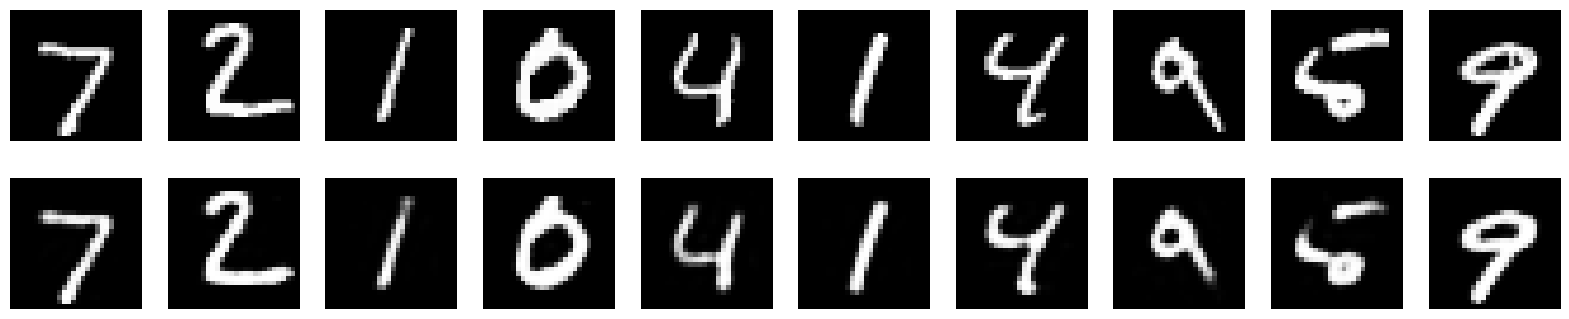

In [ ]:
# Encode and decode some images
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

# Display the original and reconstructed images
import matplotlib.pyplot as plt

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


# 3.lab 6 of dl

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, losses
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [ ]:
# load the mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# flatten shape the image from 28x28 to 784-dimensional vector
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
# load the mnist dataset


In [ ]:
# Define the encoding dimension
encoding_dim = 32
# Define the input layer
input_img = layers.Input(shape=(784,))
# Define the encoder
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# Define the decoder
decoded = layers.Dense(784, activation='sigmoid')(encoded)
# Create the autoencoder model
autoencoder = tf.keras.models.Model(inputs=input_img, outputs=decoded)
# Compile the autoencoder with the Adam optimizer and Mean Squared Error loss
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
# Train the autoencoder
autoencoder.fit(x_train, x_train,epochs=10,batch_size=256,shuffle=True,validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1087 - val_loss: 0.0416
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0385 - val_loss: 0.0298
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0283 - val_loss: 0.0233
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0226 - val_loss: 0.0194
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0191 - val_loss: 0.0169
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0168 - val_loss: 0.0151
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0151 - val_loss: 0.0138
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0139 - val_loss: 0.0127
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0129 - val_loss: 0.0119
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0122 - val_loss: 0.0114


In [ ]:

# Reconstruct the test images
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


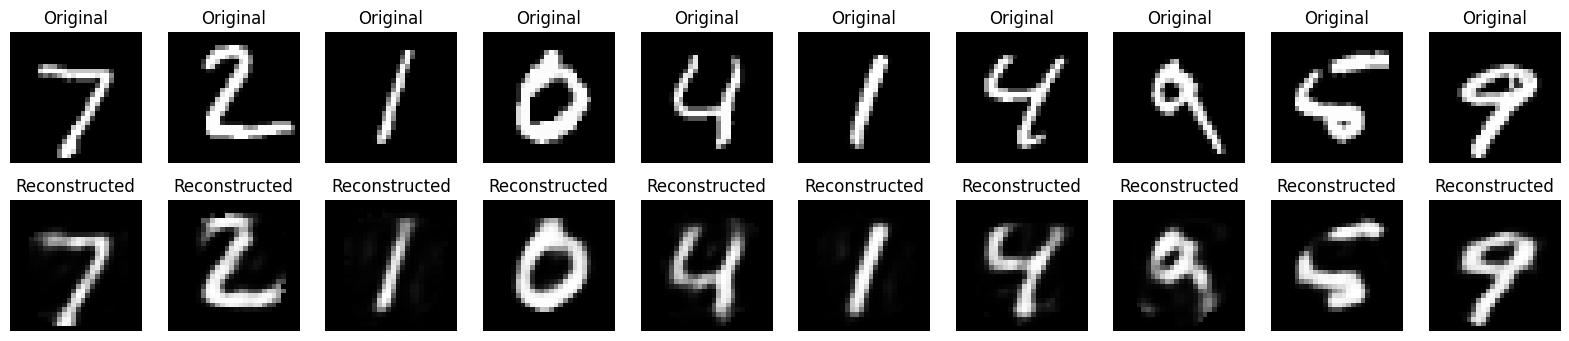

In [ ]:
# Visualize some original and reconstructed images to evaluate the autoencoder
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
  # Original image
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape((28, 28)), cmap='gray')
  plt.title("Original")
  plt.axis("off")

  # Reconstructed image
  bx = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape((28, 28)), cmap='gray')
  plt.title("Reconstructed")
  plt.axis("off")

# lab 7 of dl

In [ ]:
pip

In [ ]:
import matplotlib.pylpot as plt
import numpy as np
import pandas as pd
import tensorflow as  tf

In [ ]:
from sklearn.metrics import accuracy_score,recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import losses, layers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [ ]:
from typing_extensions import assert_type
(x_train,_), (x_test,_) = fashion_mnist.load_data()
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

x_train = x_train[..., tf.newaxis]
x_test =  x_test[..., tf.newaxis]

print(x_train.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28, 1)


In [ ]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)
x_train_noise = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noise = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

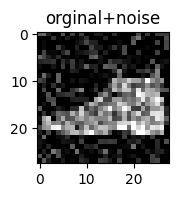

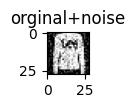

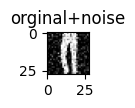

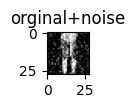

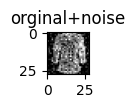

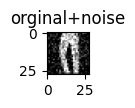

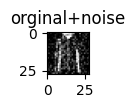

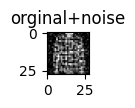

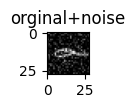

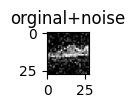

In [ ]:
n=10
plt.figure(figsize=(20,2))
for i in range(n):
    ax = plt.subplot(1,n,i+1)
    plt.title("orginal+noise")
    plt.imshow(tf.squeeze(x_test_noise[i]))
    plt.gray()
    plt.show()

In [ ]:
class Denoise(Model):
  def __init__(self):
    super(Denoise,self).__init__()
    self.encoder = tf.keras.Sequential([
        layers.Input(shape=(28,28,1)),
        layers.Conv2D(16,(3,3),activation='relu',padding='same',strides=2),
        layers.Conv2D(8,(3,3),activation='relu',padding='same',strides=2)])
    self.decoder = tf.keras.Sequential([
        layers.conv2DTranspose(8, Kernel_size=3, activation='relu', strides=2, padding='same'),
        layers.conv2DTranspose(16, Kernel_size=3, activation='relu', strides=2, padding='same'),
        layers.conv2D(1, Kernel_size=(3,3), activation='sigmoid', padding='same')])
    def call(self,x):
      encoded = self.encoder(x)
      decoded  = self.decoder(encoded)
      return decoded



In [ ]:
autoencoder = Denoise()
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(x_train_noise, x_train,
                  epochs=10,
                  shuffle=True,
                  validation_data=(x_test_noise, x_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - loss: 0.0394 - val_loss: 0.0094
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 43ms/step - loss: 0.0090 - val_loss: 0.0085
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - loss: 0.0083 - val_loss: 0.0081
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - loss: 0.0080 - val_loss: 0.0079
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 28ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - loss: 0.0073 - val_loss: 0.0072
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - loss: 0.0071 - val_loss: 0.0072


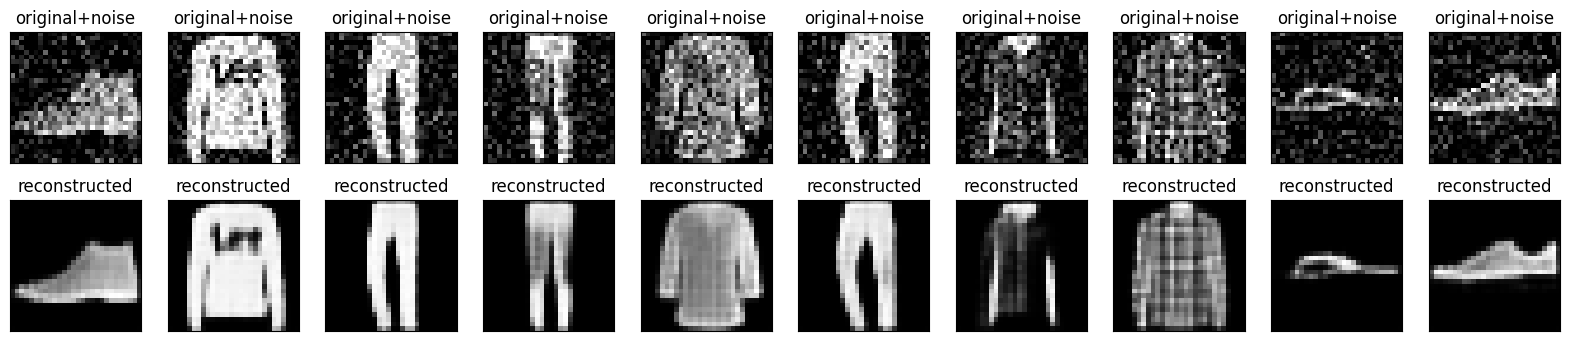

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
n= 10
plt.figure(figsize=(20,4))
for i in range(n):
    #display orignal
    ax = plt.subplot(2,n,i+1)
    plt.title("original+noise")
    plt.imshow(tf.squeeze(x_test_noise[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #display reconstruction
    bx = plt.subplot(2,n,i+n+1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.8716 - loss: 0.4340
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9738 - loss: 0.0866
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9826 - loss: 0.0552
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9869 - loss: 0.0432
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9888 - loss: 0.0341
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9803 - loss: 0.0592
Test accuracy: 0.983299970626831
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


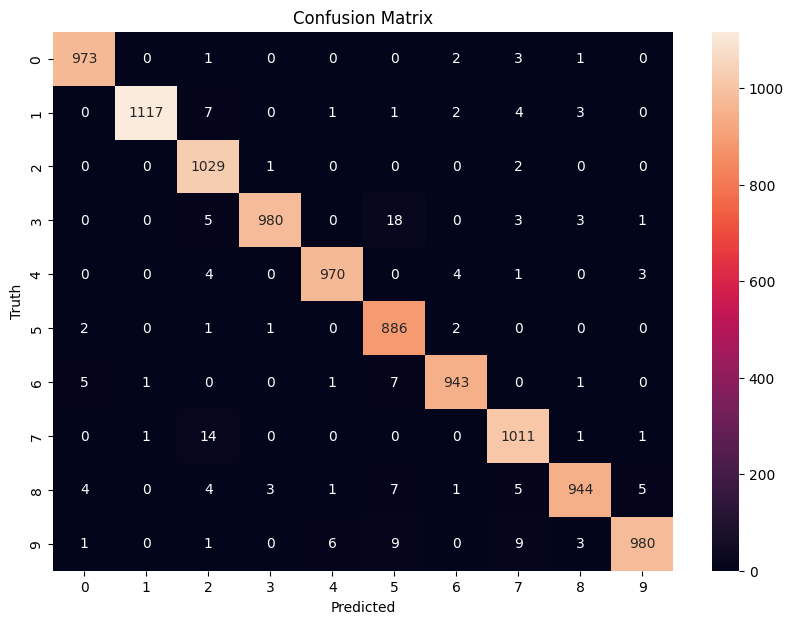

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import seaborn as sn

# load the dataset
(x_train , y_train ) , (x_test , y_test) = mnist.load_data()
x_train , x_test = x_train / 255.0 , x_test / 255.0

# define and train the model
model = Sequential([
    Conv2D(6 , (5,5),activation='relu', input_shape=(28, 28 , 1)),
    MaxPooling2D((2,2)),
    Conv2D(16 , (5,5),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(84,activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train , y_train , epochs=5)

# evaluate the model
test_loss, test_accuracy = model.evaluate(x_test , y_test)
print("Test accuracy:" , test_accuracy)
#Predict labels for test set
y_predicted_probs = model.predict(x_test)
y_predicted_labels = tf.argmax(y_predicted_probs, axis=1)

#create confusion matrix
confusion_matrix = tf.math.confusion_matrix(labels = y_test , predictions=y_predicted_labels)

#plot confusion matrix
plt.figure(figsize=(10,7))
sn.heatmap(confusion_matrix , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()